# Comparar las huellas entre diferentes familias de malware y entre familias de malware y apps benignas

Lo probaremos en el dataset2 y usando desktop-malware, desktop-apps y mobile-apps

## Comparar las familias de Malware

### JA4

In [1]:
import pandas as pd

df = pd.read_csv('../Datasets/Dataset2/desktop-malware.csv', sep=';')

malware_families = df['AppName'].unique()

ja4_per_family = df.groupby("AppName")["JA4hash"].unique().to_dict()

for family, ja4 in ja4_per_family.items():
    print(f"{family}: {len(ja4)} huellas únicas")

Agenttesla: 13 huellas únicas
Asyncrat: 14 huellas únicas
Azorult: 6 huellas únicas
Bazarbackdoor: 10 huellas únicas
DarkComet: 9 huellas únicas
Dridex: 2 huellas únicas
Emotet: 2 huellas únicas
Formbook: 6 huellas únicas
Gozi_IFSB: 1 huellas únicas
Hawkeye: 17 huellas únicas
Hawkeye Reborn: 4 huellas únicas
IceID: 6 huellas únicas
LokiBot: 5 huellas únicas
MassLogger: 9 huellas únicas
Matiex: 14 huellas únicas
Metasploit: 7 huellas únicas
Modiloader: 13 huellas únicas
Nanocore: 14 huellas únicas
Netwire: 10 huellas únicas
Njrat: 8 huellas únicas
Pony: 1 huellas únicas
QNodeService: 6 huellas únicas
Quakbot: 4 huellas únicas
Raccon: 9 huellas únicas
Remcos: 5 huellas únicas
Revengerat: 6 huellas únicas
SmokeLoader: 12 huellas únicas
Sodinokibi: 6 huellas únicas
Trickbot: 6 huellas únicas
Upatre: 2 huellas únicas
Wannacry: 25 huellas únicas
Yunsip: 2 huellas únicas
Zloader: 13 huellas únicas


In [ ]:
import numpy as np


families = list(ja4_per_family.keys())


matriz_similitud_ja4 = np.zeros((len(families), len(families)))


for i, fam_a in enumerate(families):
    for j, fam_b in enumerate(families):
        if i <= j: 
            set_a = set(ja4_per_family[fam_a])
            set_b = set(ja4_per_family[fam_b])
            
            huellas_comunes = len(set_a & set_b)
            
            total_huellas = (len(set_a) + len(set_b))
            similitud = huellas_comunes / total_huellas if total_huellas > 0 else 0
            
            matriz_similitud_ja4[i, j] = similitud
            matriz_similitud_ja4[j, i] = similitud  


df_similitud_ja4 = pd.DataFrame(matriz_similitud_ja4, index=families, columns=families)


print("Matriz de Similitud entre Familias de Malware:\n")
print(df_similitud_ja4)


📊 Matriz de Similitud entre Familias de Malware:

                Agenttesla  Asyncrat   Azorult  Bazarbackdoor  DarkComet  \
Agenttesla        0.500000  0.259259  0.210526       0.217391   0.227273   
Asyncrat          0.259259  0.500000  0.200000       0.166667   0.304348   
Azorult           0.210526  0.200000  0.500000       0.187500   0.200000   
Bazarbackdoor     0.217391  0.166667  0.187500       0.500000   0.157895   
DarkComet         0.227273  0.304348  0.200000       0.157895   0.500000   
Dridex            0.000000  0.125000  0.125000       0.083333   0.090909   
Emotet            0.000000  0.125000  0.125000       0.083333   0.090909   
Formbook          0.210526  0.150000  0.250000       0.187500   0.066667   
Gozi_IFSB         0.000000  0.066667  0.142857       0.090909   0.100000   
Hawkeye           0.333333  0.290323  0.217391       0.222222   0.230769   
Hawkeye Reborn    0.117647  0.166667  0.200000       0.142857   0.153846   
IceID             0.105263  0.100000 

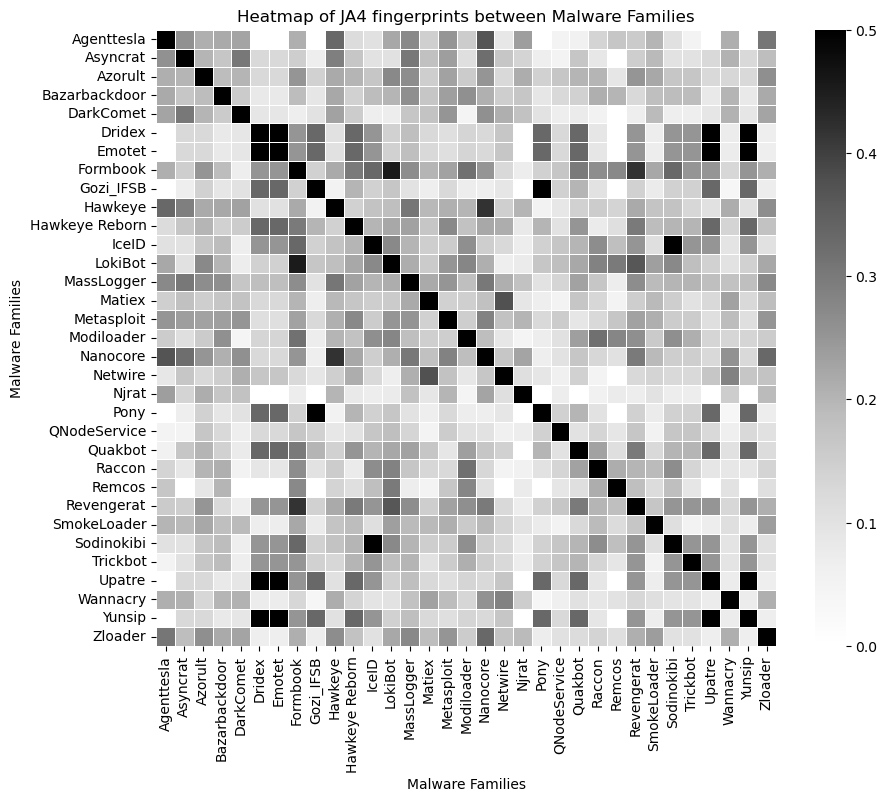

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))


sns.heatmap(df_similitud_ja4, cmap="Greys", linewidths=0.5, cbar=True, xticklabels=True, yticklabels=True)


plt.title("Heatmap of JA4 fingerprints between Malware Families")
plt.xlabel("Malware Families")
plt.ylabel("Malware Families")

plt.savefig('malware_families_JA4.png', bbox_inches='tight', dpi=300)


plt.show()


### JA4 + JA4S

In [5]:
df["JA4+JA4S"] = df["JA4hash"].astype(str) + "_" + df["JA4Shash"].astype(str)

ja4_ja4s_families = df.groupby("AppName")["JA4+JA4S"].unique().to_dict()

for family, ja4 in ja4_ja4s_families.items():
    print(f"{family}: {len(ja4)} huellas únicas")

Agenttesla: 58 huellas únicas
Asyncrat: 45 huellas únicas
Azorult: 11 huellas únicas
Bazarbackdoor: 19 huellas únicas
DarkComet: 23 huellas únicas
Dridex: 4 huellas únicas
Emotet: 4 huellas únicas
Formbook: 10 huellas únicas
Gozi_IFSB: 1 huellas únicas
Hawkeye: 80 huellas únicas
Hawkeye Reborn: 10 huellas únicas
IceID: 19 huellas únicas
LokiBot: 10 huellas únicas
MassLogger: 27 huellas únicas
Matiex: 27 huellas únicas
Metasploit: 12 huellas únicas
Modiloader: 27 huellas únicas
Nanocore: 71 huellas únicas
Netwire: 15 huellas únicas
Njrat: 15 huellas únicas
Pony: 3 huellas únicas
QNodeService: 10 huellas únicas
Quakbot: 8 huellas únicas
Raccon: 21 huellas únicas
Remcos: 7 huellas únicas
Revengerat: 17 huellas únicas
SmokeLoader: 27 huellas únicas
Sodinokibi: 63 huellas únicas
Trickbot: 12 huellas únicas
Upatre: 4 huellas únicas
Wannacry: 62 huellas únicas
Yunsip: 5 huellas únicas
Zloader: 43 huellas únicas


In [ ]:
import numpy as np


families = list(ja4_ja4s_families.keys())


matriz_similitud_ja4_ja4s = np.zeros((len(families), len(families)))


for i, fam_a in enumerate(families):
    for j, fam_b in enumerate(families):
        if i <= j:  
            set_a = set(ja4_ja4s_families[fam_a])
            set_b = set(ja4_ja4s_families[fam_b])
            
            
            huellas_comunes = len(set_a & set_b)
            
            
            total_huellas = (len(set_a) + len(set_b))
            similitud = huellas_comunes / total_huellas if total_huellas > 0 else 0
            
            
            matriz_similitud_ja4_ja4s[i, j] = similitud
            matriz_similitud_ja4_ja4s[j, i] = similitud  


df_similitud_ja4_ja4s = pd.DataFrame(matriz_similitud_ja4_ja4s, index=families, columns=families)


print("Matriz de Similitud entre Familias de Malware:\n")
print(df_similitud_ja4_ja4s)


📊 Matriz de Similitud entre Familias de Malware:

                Agenttesla  Asyncrat   Azorult  Bazarbackdoor  DarkComet  \
Agenttesla        0.500000  0.077670  0.057971       0.077922   0.111111   
Asyncrat          0.077670  0.500000  0.035714       0.046875   0.073529   
Azorult           0.057971  0.035714  0.500000       0.133333   0.205882   
Bazarbackdoor     0.077922  0.046875  0.133333       0.500000   0.119048   
DarkComet         0.111111  0.073529  0.205882       0.119048   0.500000   
Dridex            0.000000  0.040816  0.200000       0.043478   0.111111   
Emotet            0.000000  0.040816  0.200000       0.043478   0.111111   
Formbook          0.029412  0.036364  0.142857       0.068966   0.121212   
Gozi_IFSB         0.000000  0.000000  0.083333       0.050000   0.041667   
Hawkeye           0.173913  0.136000  0.065934       0.050505   0.145631   
Hawkeye Reborn    0.044118  0.036364  0.142857       0.034483   0.151515   
IceID             0.000000  0.031250 

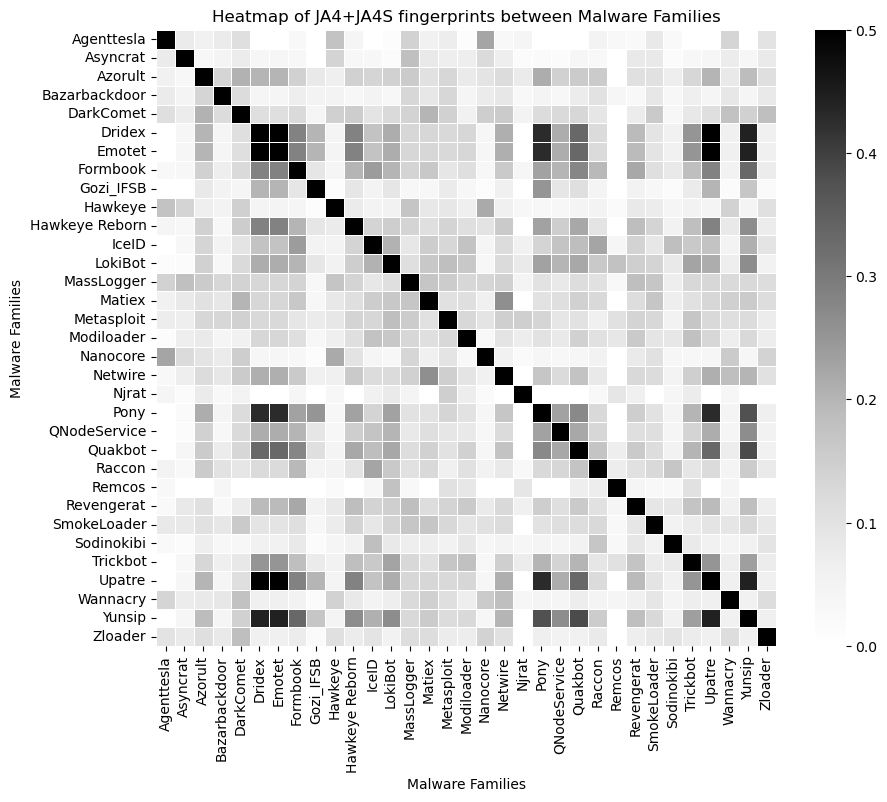

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))


sns.heatmap(df_similitud_ja4_ja4s, cmap="Greys", linewidths=0.5, cbar=True, xticklabels=True, yticklabels=True)


plt.title("Heatmap of JA4+JA4S fingerprints between Malware Families")
plt.xlabel("Malware Families")
plt.ylabel("Malware Families")


plt.savefig('malware_families_JA4_JA4S.png', bbox_inches='tight', dpi=300)
plt.show()

### JA4+JA4X

In [8]:
df["JA4+JA4X"] = df["JA4hash"].astype(str) + "_" + df["JA4X"].astype(str)

ja4_ja4x_families = df.groupby("AppName")["JA4+JA4X"].unique().to_dict()

for family, ja4 in ja4_ja4x_families.items():
    print(f"{family}: {len(ja4)} huellas únicas")

Agenttesla: 53 huellas únicas
Asyncrat: 41 huellas únicas
Azorult: 12 huellas únicas
Bazarbackdoor: 21 huellas únicas
DarkComet: 23 huellas únicas
Dridex: 2 huellas únicas
Emotet: 2 huellas únicas
Formbook: 7 huellas únicas
Gozi_IFSB: 1 huellas únicas
Hawkeye: 56 huellas únicas
Hawkeye Reborn: 8 huellas únicas
IceID: 15 huellas únicas
LokiBot: 9 huellas únicas
MassLogger: 22 huellas únicas
Matiex: 24 huellas únicas
Metasploit: 11 huellas únicas
Modiloader: 23 huellas únicas
Nanocore: 64 huellas únicas
Netwire: 12 huellas únicas
Njrat: 15 huellas únicas
Pony: 1 huellas únicas
QNodeService: 9 huellas únicas
Quakbot: 6 huellas únicas
Raccon: 18 huellas únicas
Remcos: 7 huellas únicas
Revengerat: 14 huellas únicas
SmokeLoader: 24 huellas únicas
Sodinokibi: 66 huellas únicas
Trickbot: 12 huellas únicas
Upatre: 2 huellas únicas
Wannacry: 56 huellas únicas
Yunsip: 3 huellas únicas
Zloader: 33 huellas únicas


In [ ]:
import numpy as np


families = list(ja4_ja4x_families.keys())


matriz_similitud_ja4_ja4x = np.zeros((len(families), len(families)))


for i, fam_a in enumerate(families):
    for j, fam_b in enumerate(families):
        if i <= j:  
            set_a = set(ja4_ja4x_families[fam_a])
            set_b = set(ja4_ja4x_families[fam_b])
            
            
            huellas_comunes = len(set_a & set_b)
            
            total_huellas = (len(set_a) + len(set_b))
            similitud = huellas_comunes / total_huellas if total_huellas > 0 else 0
            
            matriz_similitud_ja4_ja4x[i, j] = similitud
            matriz_similitud_ja4_ja4x[j, i] = similitud 


df_similitud_ja4_ja4x = pd.DataFrame(matriz_similitud_ja4_ja4x, index=families, columns=families)


print("Matriz de Similitud entre Familias de Malware:\n")
print(df_similitud_ja4_ja4x)


📊 Matriz de Similitud entre Familias de Malware:

                Agenttesla  Asyncrat   Azorult  Bazarbackdoor  DarkComet  \
Agenttesla        0.500000  0.117021  0.061538       0.081081   0.131579   
Asyncrat          0.117021  0.500000  0.056604       0.096774   0.156250   
Azorult           0.061538  0.056604  0.500000       0.090909   0.200000   
Bazarbackdoor     0.081081  0.096774  0.090909       0.500000   0.136364   
DarkComet         0.131579  0.156250  0.200000       0.136364   0.500000   
Dridex            0.000000  0.046512  0.071429       0.043478   0.040000   
Emotet            0.000000  0.046512  0.071429       0.043478   0.040000   
Formbook          0.050000  0.083333  0.052632       0.107143   0.066667   
Gozi_IFSB         0.000000  0.000000  0.000000       0.045455   0.000000   
Hawkeye           0.211009  0.134021  0.088235       0.090909   0.164557   
Hawkeye Reborn    0.000000  0.040816  0.050000       0.034483   0.032258   
IceID             0.000000  0.053571 

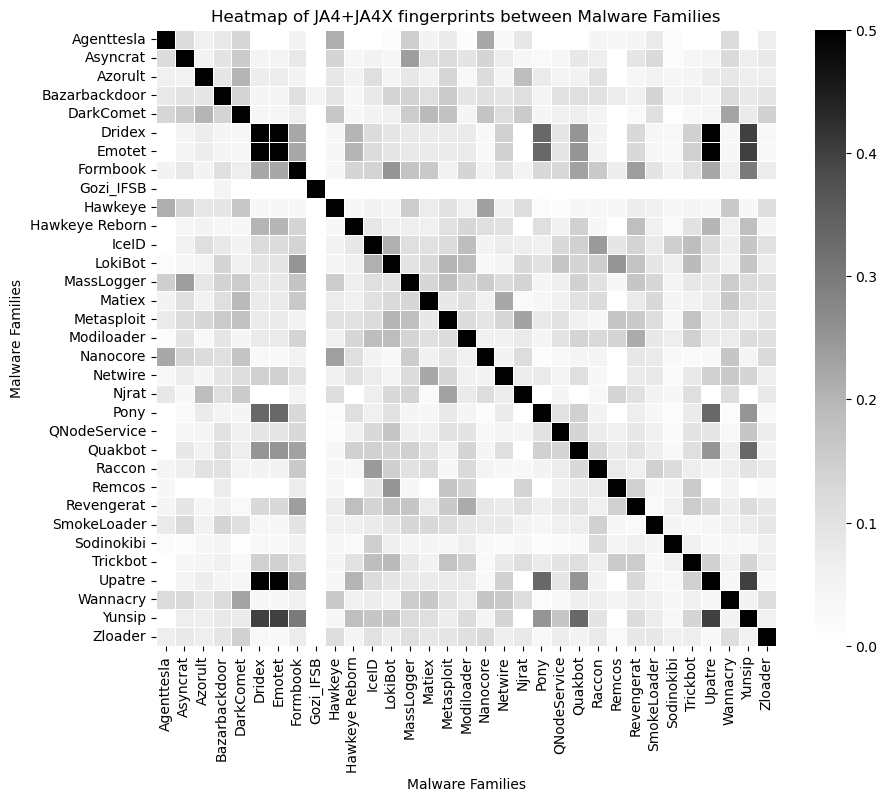

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))


sns.heatmap(df_similitud_ja4_ja4x, cmap="Greys", linewidths=0.5, cbar=True, xticklabels=True, yticklabels=True)


plt.title("Heatmap of JA4+JA4X fingerprints between Malware Families")
plt.xlabel("Malware Families")
plt.ylabel("Malware Families")

plt.savefig('malware_families_JA4_JA4X.png', bbox_inches='tight', dpi=300)


plt.show()

In [11]:
similitud = df["JA4+JA4S"].eq(df["JA4+JA4X"]).mean()
print(f"Similitud entre JA4+JA4S y JA4+JA4X: {similitud:.2%}")

Similitud entre JA4+JA4S y JA4+JA4X: 22.55%


In [12]:
diff_matrix = np.abs(matriz_similitud_ja4_ja4s - matriz_similitud_ja4_ja4x)
print("Diferencias promedio entre matrices:", diff_matrix.mean())

Diferencias promedio entre matrices: 0.037808020796320285


### JA4+SNI

In [13]:
df["JA4+SNI"] = df["JA4hash"].astype(str) + "_" + df["SNI"].astype(str)

ja4_sni_families = df.groupby("AppName")["JA4+SNI"].unique().to_dict()

for family, ja4 in ja4_sni_families.items():
    print(f"{family}: {len(ja4)} huellas únicas")

Agenttesla: 226 huellas únicas
Asyncrat: 129 huellas únicas
Azorult: 19 huellas únicas
Bazarbackdoor: 37 huellas únicas
DarkComet: 37 huellas únicas
Dridex: 4 huellas únicas
Emotet: 4 huellas únicas
Formbook: 12 huellas únicas
Gozi_IFSB: 1 huellas únicas
Hawkeye: 174 huellas únicas
Hawkeye Reborn: 10 huellas únicas
IceID: 26 huellas únicas
LokiBot: 10 huellas únicas
MassLogger: 57 huellas únicas
Matiex: 66 huellas únicas
Metasploit: 35 huellas únicas
Modiloader: 27 huellas únicas
Nanocore: 232 huellas únicas
Netwire: 47 huellas únicas
Njrat: 30 huellas únicas
Pony: 3 huellas únicas
QNodeService: 8 huellas únicas
Quakbot: 8 huellas únicas
Raccon: 24 huellas únicas
Remcos: 8 huellas únicas
Revengerat: 19 huellas únicas
SmokeLoader: 39 huellas únicas
Sodinokibi: 1057 huellas únicas
Trickbot: 11 huellas únicas
Upatre: 4 huellas únicas
Wannacry: 236 huellas únicas
Yunsip: 4 huellas únicas
Zloader: 130 huellas únicas


In [ ]:
import numpy as np


families = list(ja4_sni_families.keys())


matriz_similitud_ja4_sni = np.zeros((len(families), len(families)))


for i, fam_a in enumerate(families):
    for j, fam_b in enumerate(families):
        if i <= j:  # No calcular dos veces la misma comparación
            set_a = set(ja4_sni_families[fam_a])
            set_b = set(ja4_sni_families[fam_b])
            
            
            huellas_comunes = len(set_a & set_b)
            
            
            total_huellas = (len(set_a) + len(set_b))
            similitud = huellas_comunes / total_huellas if total_huellas > 0 else 0
            
            
            matriz_similitud_ja4_sni[i, j] = similitud
            matriz_similitud_ja4_sni[j, i] = similitud  


df_similitud_ja4_sni = pd.DataFrame(matriz_similitud_ja4_sni, index=families, columns=families)


print("Matriz de Similitud entre Familias de Malware:\n")
print(df_similitud_ja4_sni)


📊 Matriz de Similitud entre Familias de Malware:

                Agenttesla  Asyncrat   Azorult  Bazarbackdoor  DarkComet  \
Agenttesla        0.500000  0.022535  0.008163       0.041825   0.003802   
Asyncrat          0.022535  0.500000  0.020270       0.012048   0.012048   
Azorult           0.008163  0.020270  0.500000       0.142857   0.178571   
Bazarbackdoor     0.041825  0.012048  0.142857       0.500000   0.108108   
DarkComet         0.003802  0.012048  0.178571       0.108108   0.500000   
Dridex            0.000000  0.015038  0.130435       0.048780   0.073171   
Emotet            0.000000  0.015038  0.130435       0.048780   0.073171   
Formbook          0.016807  0.014184  0.096774       0.040816   0.061224   
Gozi_IFSB         0.000000  0.007692  0.050000       0.000000   0.026316   
Hawkeye           0.052500  0.059406  0.067358       0.047393   0.085308   
Hawkeye Reborn    0.000000  0.014388  0.103448       0.042553   0.063830   
IceID             0.000000  0.012903 

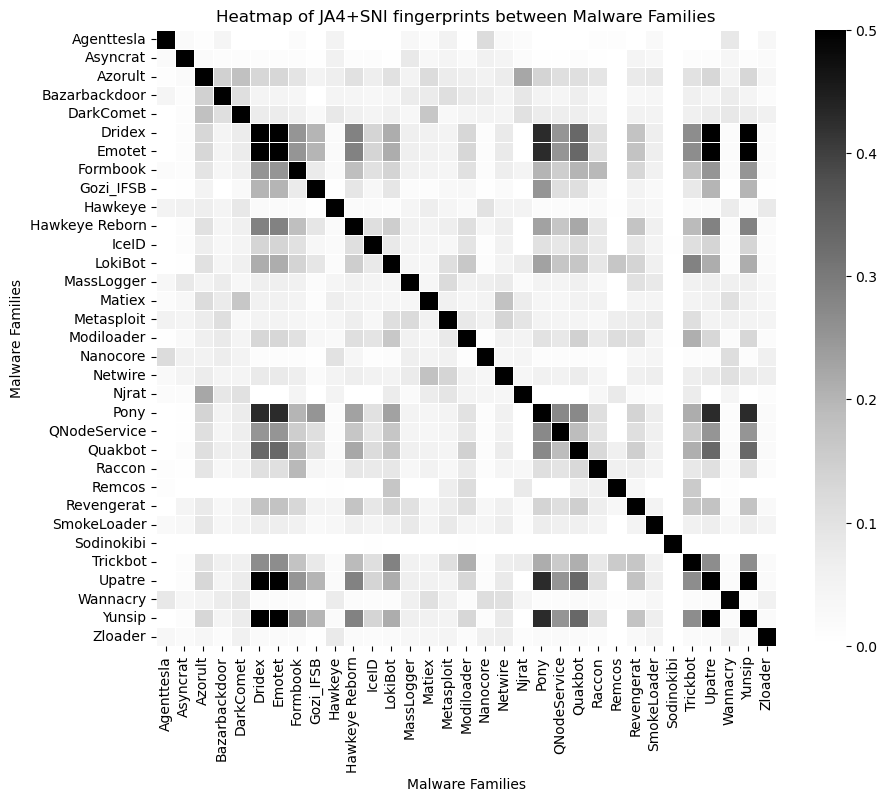

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))


sns.heatmap(df_similitud_ja4_sni, cmap="Greys", linewidths=0.5, cbar=True, xticklabels=True, yticklabels=True)


plt.title("Heatmap of JA4+SNI fingerprints between Malware Families")
plt.xlabel("Malware Families")
plt.ylabel("Malware Families")

plt.savefig('malware_families_JA4_SNI.png', bbox_inches='tight', dpi=300)
plt.show()

### JA4 + JA4S + JA4X

In [16]:
df["JA4+JA4S+JA4X"] = df["JA4hash"].astype(str) + "_" + df["JA4Shash"].astype(str) + "_" + df["JA4X"].astype(str)

ja4_ja4s_ja4x_families = df.groupby("AppName")["JA4+JA4S+JA4X"].apply(set).to_dict()

for family, ja4 in ja4_ja4s_ja4x_families.items():
    print(f"{family}: {len(ja4)} huellas únicas")

Agenttesla: 90 huellas únicas
Asyncrat: 53 huellas únicas
Azorult: 14 huellas únicas
Bazarbackdoor: 22 huellas únicas
DarkComet: 30 huellas únicas
Dridex: 4 huellas únicas
Emotet: 4 huellas únicas
Formbook: 10 huellas únicas
Gozi_IFSB: 1 huellas únicas
Hawkeye: 102 huellas únicas
Hawkeye Reborn: 12 huellas únicas
IceID: 21 huellas únicas
LokiBot: 11 huellas únicas
MassLogger: 31 huellas únicas
Matiex: 30 huellas únicas
Metasploit: 14 huellas únicas
Modiloader: 31 huellas únicas
Nanocore: 108 huellas únicas
Netwire: 16 huellas únicas
Njrat: 20 huellas únicas
Pony: 3 huellas únicas
QNodeService: 11 huellas únicas
Quakbot: 8 huellas únicas
Raccon: 21 huellas únicas
Remcos: 8 huellas únicas
Revengerat: 18 huellas únicas
SmokeLoader: 29 huellas únicas
Sodinokibi: 158 huellas únicas
Trickbot: 14 huellas únicas
Upatre: 4 huellas únicas
Wannacry: 84 huellas únicas
Yunsip: 5 huellas únicas
Zloader: 46 huellas únicas


In [ ]:
import numpy as np


families = list(ja4_ja4s_ja4x_families.keys())


matriz_similitud_ja4_ja4s_ja4x = np.zeros((len(families), len(families)))


for i, fam_a in enumerate(families):
    for j, fam_b in enumerate(families):
        if i <= j:  
            set_a = set(ja4_ja4s_ja4x_families[fam_a])
            set_b = set(ja4_ja4s_ja4x_families[fam_b])
            
            huellas_comunes = len(set_a & set_b)
            
            
            total_huellas = (len(set_a) + len(set_b))
            similitud = huellas_comunes / total_huellas if total_huellas > 0 else 0
            
            
            matriz_similitud_ja4_ja4s_ja4x[i, j] = similitud
            matriz_similitud_ja4_ja4s_ja4x[j, i] = similitud  


df_similitud_ja4_ja4s_ja4x = pd.DataFrame(matriz_similitud_ja4_ja4s_ja4x, index=families, columns=families)


print("Matriz de Similitud entre Familias de Malware:\n")
print(df_similitud_ja4_ja4s_ja4x)


📊 Matriz de Similitud entre Familias de Malware:

                Agenttesla  Asyncrat   Azorult  Bazarbackdoor  DarkComet  \
Agenttesla        0.500000  0.048951  0.000000       0.017857   0.033333   
Asyncrat          0.048951  0.500000  0.014925       0.026667   0.060241   
Azorult           0.000000  0.014925  0.500000       0.083333   0.204545   
Bazarbackdoor     0.017857  0.026667  0.083333       0.500000   0.096154   
DarkComet         0.033333  0.060241  0.204545       0.096154   0.500000   
Dridex            0.000000  0.035088  0.166667       0.038462   0.088235   
Emotet            0.000000  0.035088  0.166667       0.038462   0.088235   
Formbook          0.020000  0.031746  0.125000       0.062500   0.100000   
Gozi_IFSB         0.000000  0.000000  0.000000       0.043478   0.000000   
Hawkeye           0.104167  0.083871  0.068966       0.040323   0.121212   
Hawkeye Reborn    0.000000  0.030769  0.115385       0.029412   0.071429   
IceID             0.000000  0.027027 

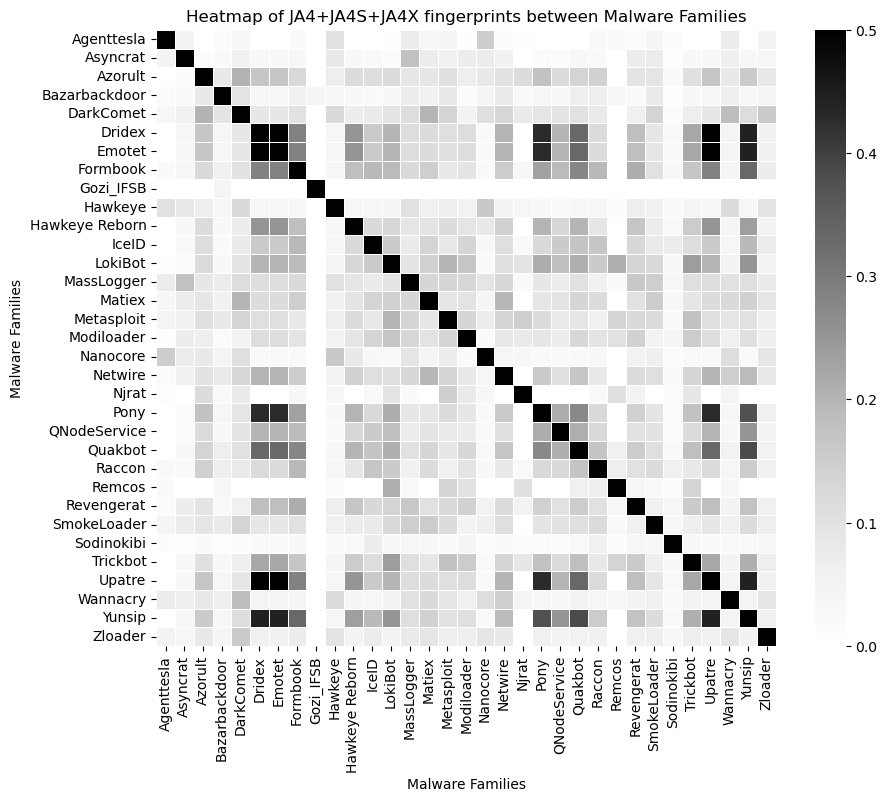

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))


sns.heatmap(df_similitud_ja4_ja4s_ja4x, cmap="Greys", linewidths=0.5, cbar=True, xticklabels=True, yticklabels=True)


plt.title("Heatmap of JA4+JA4S+JA4X fingerprints between Malware Families")
plt.xlabel("Malware Families")
plt.ylabel("Malware Families")

plt.savefig('malware_families_JA4_JA4S_JA4X.png', bbox_inches='tight', dpi=300)


plt.show()

### JA4 + JA4S + JA4X + SNI

In [19]:
df["JA4+JA4S+JA4X+SNI"] = df["JA4hash"].astype(str) + "_" + df["JA4Shash"].astype(str) + "_" + df["JA4X"].astype(str)+ "_" + df["SNI"].astype(str)

ja4_ja4s_ja4x_sni_families = df.groupby("AppName")["JA4+JA4S+JA4X+SNI"].apply(set).to_dict()

for family, ja4 in ja4_ja4s_ja4x_sni_families.items():
    print(f"{family}: {len(ja4)} huellas únicas")

Agenttesla: 238 huellas únicas
Asyncrat: 139 huellas únicas
Azorult: 20 huellas únicas
Bazarbackdoor: 42 huellas únicas
DarkComet: 42 huellas únicas
Dridex: 4 huellas únicas
Emotet: 4 huellas únicas
Formbook: 14 huellas únicas
Gozi_IFSB: 1 huellas únicas
Hawkeye: 191 huellas únicas
Hawkeye Reborn: 12 huellas únicas
IceID: 34 huellas únicas
LokiBot: 13 huellas únicas
MassLogger: 60 huellas únicas
Matiex: 71 huellas únicas
Metasploit: 39 huellas únicas
Modiloader: 36 huellas únicas
Nanocore: 249 huellas únicas
Netwire: 47 huellas únicas
Njrat: 38 huellas únicas
Pony: 3 huellas únicas
QNodeService: 11 huellas únicas
Quakbot: 9 huellas únicas
Raccon: 26 huellas únicas
Remcos: 11 huellas únicas
Revengerat: 23 huellas únicas
SmokeLoader: 42 huellas únicas
Sodinokibi: 1141 huellas únicas
Trickbot: 16 huellas únicas
Upatre: 4 huellas únicas
Wannacry: 252 huellas únicas
Yunsip: 5 huellas únicas
Zloader: 138 huellas únicas


In [ ]:
import numpy as np


families = list(ja4_ja4s_ja4x_sni_families.keys())

matriz_similitud_ja4_ja4s_ja4x_sni = np.zeros((len(families), len(families)))

for i, fam_a in enumerate(families):
    for j, fam_b in enumerate(families):
        if i <= j: 
            set_a = set(ja4_ja4s_ja4x_sni_families[fam_a])
            set_b = set(ja4_ja4s_ja4x_sni_families[fam_b])
            
            
            huellas_comunes = len(set_a & set_b)
            
            
            total_huellas = (len(set_a) + len(set_b))
            similitud = huellas_comunes / total_huellas if total_huellas > 0 else 0
            
            matriz_similitud_ja4_ja4s_ja4x_sni[i, j] = similitud
            matriz_similitud_ja4_ja4s_ja4x_sni[j, i] = similitud  


df_similitud_ja4_ja4s_ja4x_sni = pd.DataFrame(matriz_similitud_ja4_ja4s_ja4x_sni, index=families, columns=families)


print("\Matriz de Similitud entre Familias de Malware:\n")
print(df_similitud_ja4_ja4s_ja4x_sni)


📊 Matriz de Similitud entre Familias de Malware:

                Agenttesla  Asyncrat   Azorult  Bazarbackdoor  DarkComet  \
Agenttesla        0.500000  0.021220  0.000000       0.039286   0.003571   
Asyncrat          0.021220  0.500000  0.006289       0.011050   0.011050   
Azorult           0.000000  0.006289  0.500000       0.016129   0.177419   
Bazarbackdoor     0.039286  0.011050  0.016129       0.500000   0.023810   
DarkComet         0.003571  0.011050  0.177419       0.023810   0.500000   
Dridex            0.000000  0.013986  0.125000       0.021739   0.065217   
Emotet            0.000000  0.013986  0.125000       0.021739   0.065217   
Formbook          0.015873  0.013072  0.088235       0.017857   0.053571   
Gozi_IFSB         0.000000  0.000000  0.000000       0.000000   0.000000   
Hawkeye           0.046620  0.054545  0.052133       0.017167   0.077253   
Hawkeye Reborn    0.000000  0.013245  0.093750       0.018519   0.055556   
IceID             0.000000  0.011561 

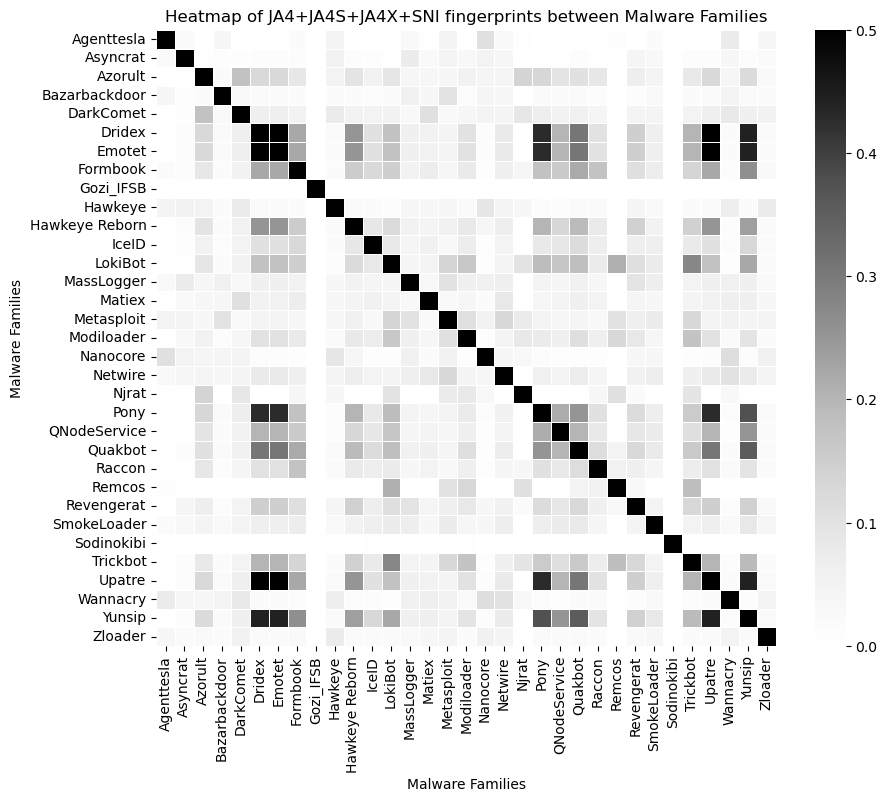

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))


sns.heatmap(df_similitud_ja4_ja4s_ja4x_sni, cmap="Greys", linewidths=0.5, cbar=True, xticklabels=True, yticklabels=True)


plt.title("Heatmap of JA4+JA4S+JA4X+SNI fingerprints between Malware Families")
plt.xlabel("Malware Families")
plt.ylabel("Malware Families")

plt.savefig('malware_families_JA4_JA4S_JA4X_SNI.png', bbox_inches='tight', dpi=300)


plt.show()

In [22]:
similitud = df["JA4+JA4S+JA4X"].eq(df["JA4+JA4S+JA4X+SNI"]).mean()
print(f"Similitud entre JA4+JA4S+JA4X y JA4+JA4S+JA4X+SNI: {similitud:.2%}")


Similitud entre JA4+JA4S+JA4X y JA4+JA4S+JA4X+SNI: 0.00%


In [23]:
diff_matrix = np.abs(matriz_similitud_ja4_ja4s_ja4x - matriz_similitud_ja4_ja4s_ja4x_sni)
print("Diferencias promedio entre matrices:", diff_matrix.mean())

Diferencias promedio entre matrices: 0.028436151821647562


In [24]:
diff_matrix = np.abs(matriz_similitud_ja4_ja4s_ja4x - matriz_similitud_ja4_ja4x)
print("Diferencias promedio entre matrices:", diff_matrix.mean())

Diferencias promedio entre matrices: 0.0321161889525329


In [25]:
diff_matrix = np.abs(matriz_similitud_ja4_ja4s_ja4x - matriz_similitud_ja4_ja4s)
print("Diferencias promedio entre matrices:", diff_matrix.mean())

Diferencias promedio entre matrices: 0.019194620573674784


## Comparar familias de malware entre familias de apps benignas

In [44]:
import pandas as pd


df_desktop_malware = pd.read_csv('../Datasets/Dataset2/desktop-malware.csv', sep=';')
df_desktop_apps = pd.read_csv('../Datasets/Dataset2/desktop-apps.csv', sep=';')
df_mobile_malware = pd.read_csv('../Datasets/Dataset2/mobile-malware.csv', sep=';')
df_mobile_apps = pd.read_csv('../Datasets/Dataset2/mobile-apps.csv', sep=';')

familias_desktop_malware = df_desktop_malware["AppName"].unique()
familias_desktop_apps = df_desktop_apps["AppName"].unique()
familias_mobile_malware = df_mobile_malware["AppName"].unique()
familias_mobile_apps = df_mobile_apps["AppName"].unique()


print("Ejemplo de familias en cada grupo:")
print("\t-Desktop Malware:", familias_desktop_malware[:5])
print("\t-Desktop Apps:", familias_desktop_apps[:5])
print("\t-Mobile Malware:", familias_mobile_malware[:5])
print("\t-Mobile Apps:", familias_mobile_apps[:5])

Ejemplo de familias en cada grupo:
	-Desktop Malware: ['Hawkeye' nan 'Netwire' 'Asyncrat' 'QNodeService']
	-Desktop Apps: ['AmazonMusic Exe' 'AmazonMusicHelper Exe' 'AMPLibraryAgent Exe'
 'AppleTV Exe' 'BackgroundTaskHost Exe']
	-Mobile Malware: ['Malware Android11' 'Malware Android14' 'Malware Android13']
	-Mobile Apps: ['Accuweather' 'Aliexpress' 'Alipay' 'Alza' 'Capcut']


In [45]:
df_desktop_malware["JA4+JA4S"] = df_desktop_malware["JA4hash"].astype(str) + "_" + df_desktop_malware["JA4Shash"].astype(str)
df_desktop_malware["JA4+JA4X"] = df_desktop_malware["JA4hash"].astype(str) + "_" + df_desktop_malware["JA4X"].astype(str)
df_desktop_malware["JA4+SNI"] = df_desktop_malware["JA4hash"].astype(str) + "_" + df_desktop_malware["SNI"].astype(str)
df_desktop_malware["JA4+JA4S+SNI"] = df_desktop_malware["JA4hash"].astype(str) + "_" + df_desktop_malware["JA4Shash"].astype(str) + "_" + df_desktop_malware["SNI"].astype(str)
df_desktop_malware["JA4+JA4S+JA4X"] = df_desktop_malware["JA4hash"].astype(str) + "_" + df_desktop_malware["JA4Shash"].astype(str) + "_" + df_desktop_malware["JA4X"].astype(str)

df_desktop_apps["JA4+JA4S"] = df_desktop_apps["JA4hash"].astype(str) + "_" + df_desktop_apps["JA4Shash"].astype(str)
df_desktop_apps["JA4+JA4X"] = df_desktop_apps["JA4hash"].astype(str) + "_" + df_desktop_apps["JA4X"].astype(str)
df_desktop_apps["JA4+SNI"] = df_desktop_apps["JA4hash"].astype(str) + "_" + df_desktop_apps["SNI"].astype(str)
df_desktop_apps["JA4+JA4S+SNI"] = df_desktop_apps["JA4hash"].astype(str) + "_" + df_desktop_apps["JA4Shash"].astype(str) + "_" + df_desktop_apps["SNI"].astype(str)
df_desktop_apps["JA4+JA4S+JA4X"] = df_desktop_apps["JA4hash"].astype(str) + "_" + df_desktop_apps["JA4Shash"].astype(str) + "_" + df_desktop_apps["JA4X"].astype(str)

df_mobile_malware["JA4+JA4S"] = df_mobile_malware["JA4hash"].astype(str) + "_" + df_mobile_malware["JA4Shash"].astype(str)
df_mobile_malware["JA4+JA4X"] = df_mobile_malware["JA4hash"].astype(str) + "_" + df_mobile_malware["JA4X"].astype(str)
df_mobile_malware["JA4+SNI"] = df_mobile_malware["JA4hash"].astype(str) + "_" + df_mobile_malware["SNI"].astype(str)
df_mobile_malware["JA4+JA4S+SNI"] = df_mobile_malware["JA4hash"].astype(str) + "_" + df_mobile_malware["JA4Shash"].astype(str) + "_" + df_mobile_malware["SNI"].astype(str)
df_mobile_malware["JA4+JA4S+JA4X"] = df_mobile_malware["JA4hash"].astype(str) + "_" + df_mobile_malware["JA4Shash"].astype(str) + "_" + df_mobile_malware["JA4X"].astype(str)


df_mobile_apps["JA4+JA4S"] = df_mobile_apps["JA4hash"].astype(str) + "_" + df_mobile_apps["JA4Shash"].astype(str)
df_mobile_apps["JA4+JA4X"] = df_mobile_apps["JA4hash"].astype(str) + "_" + df_mobile_apps["JA4X"].astype(str)
df_mobile_apps["JA4+SNI"] = df_mobile_apps["JA4hash"].astype(str) + "_" + df_mobile_apps["SNI"].astype(str)
df_mobile_apps["JA4+JA4S+SNI"] = df_mobile_apps["JA4hash"].astype(str) + "_" + df_mobile_apps["JA4Shash"].astype(str) + "_" + df_mobile_apps["SNI"].astype(str)
df_mobile_apps["JA4+JA4S+JA4X"] = df_mobile_apps["JA4hash"].astype(str) + "_" + df_mobile_apps["JA4Shash"].astype(str) + "_" + df_mobile_apps["JA4X"].astype(str)

### JA4

In [46]:
ja4_malware_desktop = df_desktop_malware.groupby("AppName")["JA4hash"].unique().to_dict()
ja4_malware_movil = df_mobile_malware.groupby("AppName")["JA4hash"].unique().to_dict()

ja4_apps_desktop = df_desktop_apps.groupby("AppName")["JA4hash"].unique().to_dict()
ja4_apps_movil = df_mobile_apps.groupby("AppName")["JA4hash"].unique().to_dict()

ja4_malware = {**ja4_malware_desktop, **ja4_malware_movil}  
ja4_apps = {**ja4_apps_desktop, **ja4_apps_movil}

In [ ]:
import numpy as np


families_malware = list(ja4_malware.keys())
families_apps = list(ja4_apps.keys())


matriz_similitud_ja4 = np.zeros((len(families_malware), len(families_apps)))


for i, fam_a in enumerate(families_malware):
    for j, fam_b in enumerate(families_apps):
        set_a = set(ja4_malware[fam_a])
        set_b = set(ja4_apps[fam_b])
        
        huellas_comunes = len(set_a & set_b)
        
        
        total_huellas = len(set_a) + len(set_b)
        similitud = huellas_comunes / total_huellas if total_huellas > 0 else 0
        
        
        matriz_similitud_ja4[i, j] = similitud


df_similitud_ja4 = pd.DataFrame(matriz_similitud_ja4, index=families_malware, columns=families_apps)


print("Matriz de Similitud JA4 entre Malware y Aplicaciones Benignas:\n")
print(df_similitud_ja4)


📊 Matriz de Similitud JA4 entre Malware y Aplicaciones Benignas:

                   AMPLibraryAgent Exe  AmazonMusic Exe  \
Agenttesla                    0.000000              0.0   
Asyncrat                      0.062500              0.0   
Azorult                       0.125000              0.0   
Bazarbackdoor                 0.083333              0.0   
DarkComet                     0.090909              0.0   
Dridex                        0.250000              0.0   
Emotet                        0.250000              0.0   
Formbook                      0.125000              0.0   
Gozi_IFSB                     0.333333              0.0   
Hawkeye                       0.052632              0.0   
Hawkeye Reborn                0.166667              0.0   
IceID                         0.125000              0.0   
LokiBot                       0.142857              0.0   
MassLogger                    0.090909              0.0   
Matiex                        0.062500          

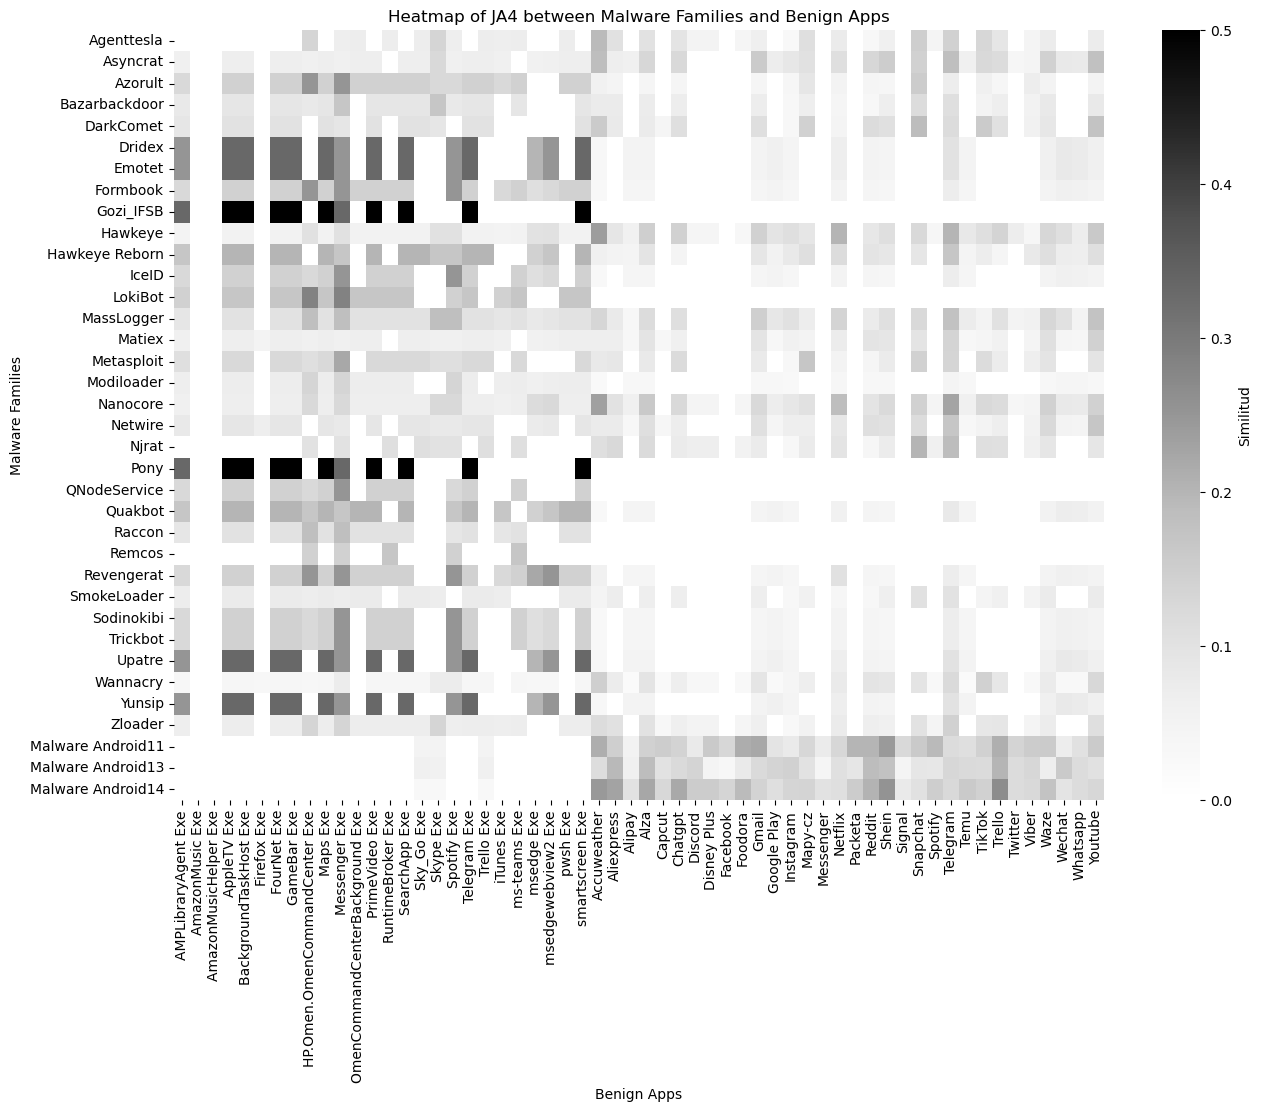

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df_similitud_ja4, cmap="Greys", annot=False, cbar_kws={'label': 'Similitud'}, vmin=0,vmax=0.5)

plt.title("Heatmap of JA4 between Malware Families and Benign Apps")
plt.xlabel("Benign Apps")
plt.ylabel("Malware Families")

plt.savefig('benign_malware_JA4.png', bbox_inches='tight', dpi=300)
plt.show()

### JA4+JA4S

In [49]:
ja4_malware_desktop = df_desktop_malware.groupby("AppName")["JA4+JA4S"].unique().to_dict()
ja4_malware_movil = df_mobile_malware.groupby("AppName")["JA4+JA4S"].unique().to_dict()

ja4_apps_desktop = df_desktop_apps.groupby("AppName")["JA4+JA4S"].unique().to_dict()
ja4_apps_movil = df_mobile_apps.groupby("AppName")["JA4+JA4S"].unique().to_dict()

ja4_malware = {**ja4_malware_desktop, **ja4_malware_movil}  
ja4_apps = {**ja4_apps_desktop, **ja4_apps_movil}

In [ ]:
import numpy as np


families_malware = list(ja4_malware.keys())
families_apps = list(ja4_apps.keys())


matriz_similitud_ja4_ja4s = np.zeros((len(families_malware), len(families_apps)))

for i, fam_a in enumerate(families_malware):
    for j, fam_b in enumerate(families_apps):
        set_a = set(ja4_malware[fam_a])
        set_b = set(ja4_apps[fam_b])
        
        huellas_comunes = len(set_a & set_b)
        
        total_huellas = len(set_a) + len(set_b)
        similitud = huellas_comunes / total_huellas if total_huellas > 0 else 0
        
        matriz_similitud_ja4_ja4s[i, j] = similitud

df_similitud_ja4_ja4s = pd.DataFrame(matriz_similitud_ja4_ja4s, index=families_malware, columns=families_apps)

print("Matriz de Similitud JA4 entre Malware y Aplicaciones Benignas:\n")
print(df_similitud_ja4_ja4s)


📊 Matriz de Similitud JA4 entre Malware y Aplicaciones Benignas:

                   AMPLibraryAgent Exe  AmazonMusic Exe  \
Agenttesla                    0.000000              0.0   
Asyncrat                      0.020833              0.0   
Azorult                       0.000000              0.0   
Bazarbackdoor                 0.000000              0.0   
DarkComet                     0.000000              0.0   
Dridex                        0.000000              0.0   
Emotet                        0.000000              0.0   
Formbook                      0.000000              0.0   
Gozi_IFSB                     0.000000              0.0   
Hawkeye                       0.000000              0.0   
Hawkeye Reborn                0.000000              0.0   
IceID                         0.000000              0.0   
LokiBot                       0.000000              0.0   
MassLogger                    0.033333              0.0   
Matiex                        0.000000          

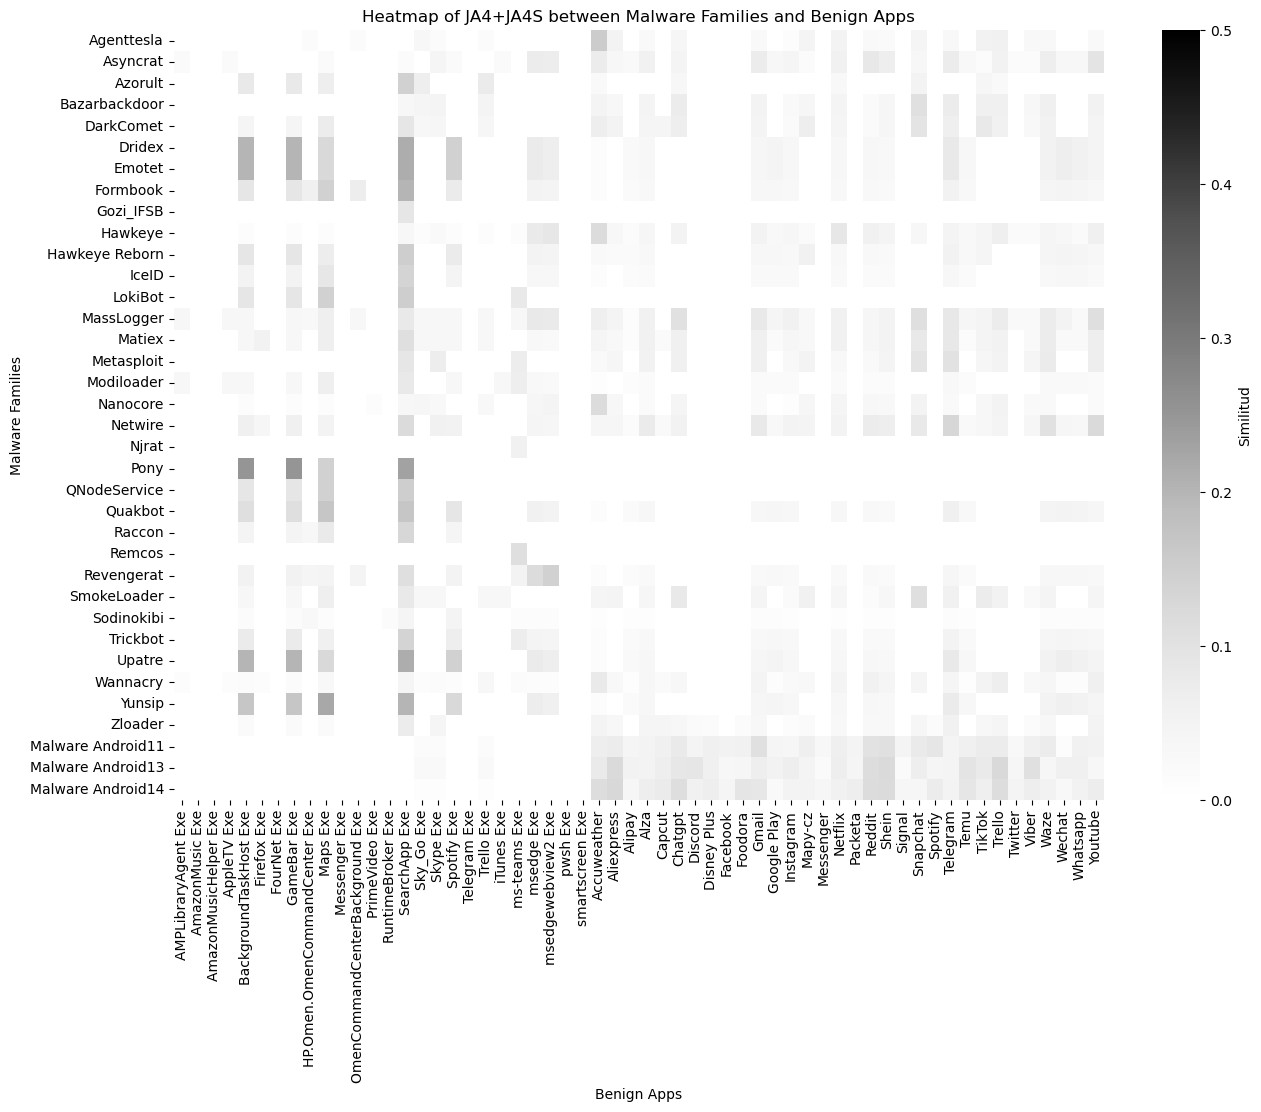

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 10))
sns.heatmap(df_similitud_ja4_ja4s, cmap="Greys", annot=False, cbar_kws={'label': 'Similitud'}, vmin=0,vmax=0.5)

plt.title("Heatmap of JA4+JA4S between Malware Families and Benign Apps")
plt.xlabel("Benign Apps")
plt.ylabel("Malware Families")
plt.savefig('benign_malware_JA4_JA4S.png', bbox_inches='tight', dpi=300)

plt.show()

### JA4+JA4X

In [52]:
ja4_malware_desktop = df_desktop_malware.groupby("AppName")["JA4+JA4X"].unique().to_dict()
ja4_malware_movil = df_mobile_malware.groupby("AppName")["JA4+JA4X"].unique().to_dict()

ja4_apps_desktop = df_desktop_apps.groupby("AppName")["JA4+JA4X"].unique().to_dict()
ja4_apps_movil = df_mobile_apps.groupby("AppName")["JA4+JA4X"].unique().to_dict()

ja4_malware = {**ja4_malware_desktop, **ja4_malware_movil}  
ja4_apps = {**ja4_apps_desktop, **ja4_apps_movil}

In [ ]:
import numpy as np

families_malware = list(ja4_malware.keys())
families_apps = list(ja4_apps.keys())

matriz_similitud_ja4_ja4x = np.zeros((len(families_malware), len(families_apps)))

for i, fam_a in enumerate(families_malware):
    for j, fam_b in enumerate(families_apps):
        set_a = set(ja4_malware[fam_a])
        set_b = set(ja4_apps[fam_b])
        
        huellas_comunes = len(set_a & set_b)
        
        total_huellas = len(set_a) + len(set_b)
        similitud = huellas_comunes / total_huellas if total_huellas > 0 else 0
        
        matriz_similitud_ja4_ja4x[i, j] = similitud

df_similitud_ja4_ja4x = pd.DataFrame(matriz_similitud_ja4_ja4x, index=families_malware, columns=families_apps)

print("Matriz de Similitud JA4 entre Malware y Aplicaciones Benignas:\n")
print(df_similitud_ja4_ja4s)


📊 Matriz de Similitud JA4 entre Malware y Aplicaciones Benignas:

                   AMPLibraryAgent Exe  AmazonMusic Exe  \
Agenttesla                    0.000000              0.0   
Asyncrat                      0.020833              0.0   
Azorult                       0.000000              0.0   
Bazarbackdoor                 0.000000              0.0   
DarkComet                     0.000000              0.0   
Dridex                        0.000000              0.0   
Emotet                        0.000000              0.0   
Formbook                      0.000000              0.0   
Gozi_IFSB                     0.000000              0.0   
Hawkeye                       0.000000              0.0   
Hawkeye Reborn                0.000000              0.0   
IceID                         0.000000              0.0   
LokiBot                       0.000000              0.0   
MassLogger                    0.033333              0.0   
Matiex                        0.000000          

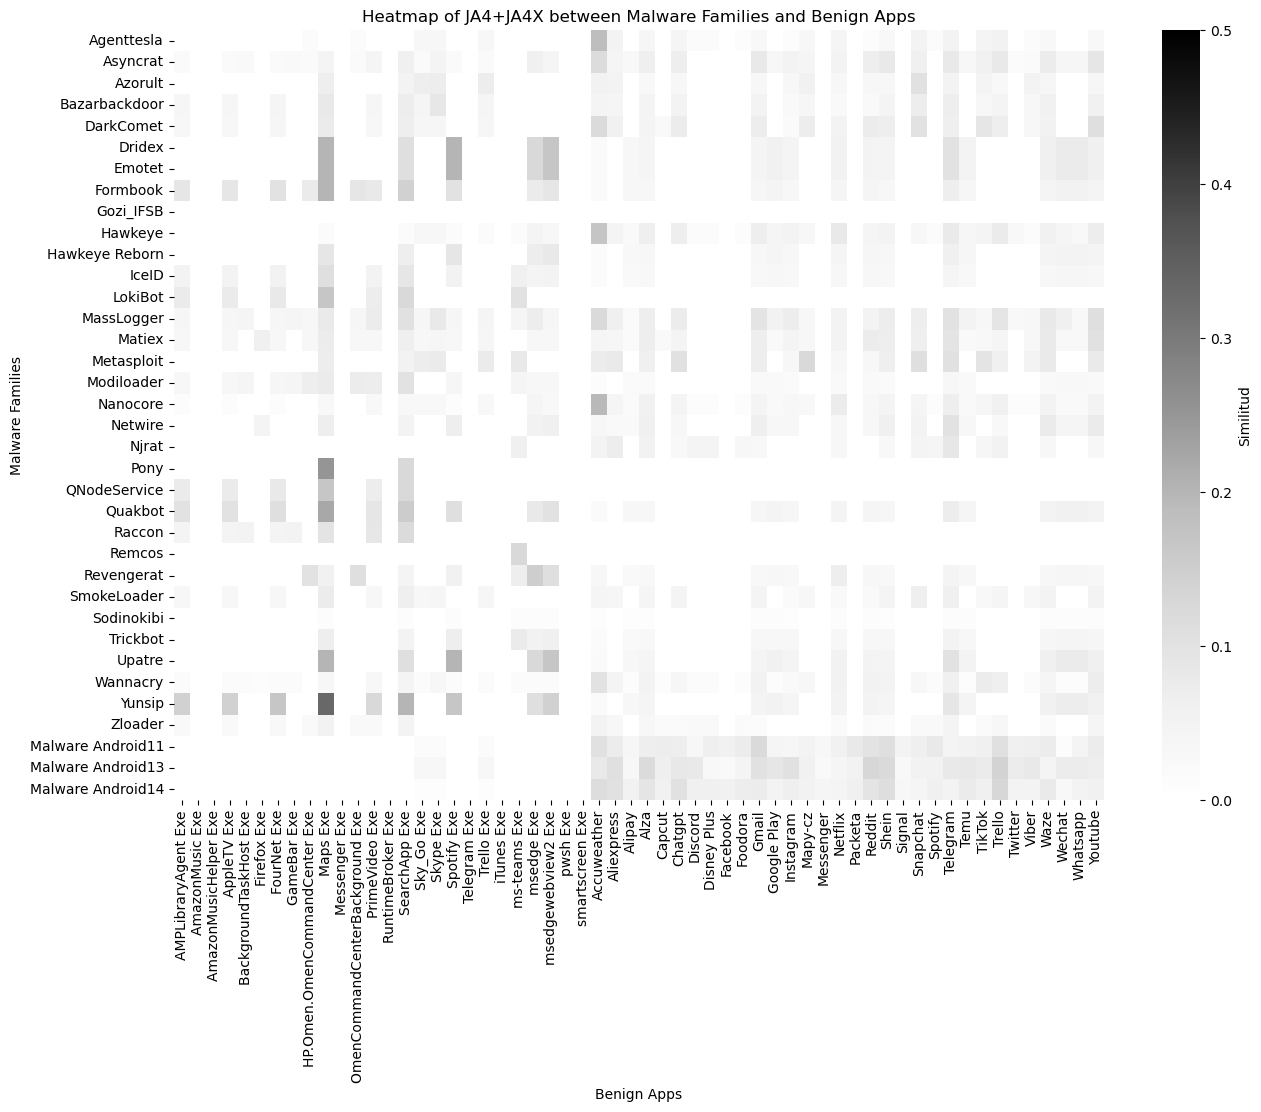

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df_similitud_ja4_ja4x, cmap="Greys", annot=False, cbar_kws={'label': 'Similitud'}, vmin=0, vmax=0.5)

plt.title("Heatmap of JA4+JA4X between Malware Families and Benign Apps")
plt.xlabel("Benign Apps")
plt.ylabel("Malware Families")

plt.savefig('benign_malware_JA4_JA4X.png', bbox_inches='tight', dpi=300)
plt.show()

### JA4+JA4S+SNI

In [55]:
ja4_malware_desktop = df_desktop_malware.groupby("AppName")["JA4+JA4S+SNI"].unique().to_dict()
ja4_malware_movil = df_mobile_malware.groupby("AppName")["JA4+JA4S+SNI"].unique().to_dict()

ja4_apps_desktop = df_desktop_apps.groupby("AppName")["JA4+JA4S+SNI"].unique().to_dict()
ja4_apps_movil = df_mobile_apps.groupby("AppName")["JA4+JA4S+SNI"].unique().to_dict()

ja4_malware = {**ja4_malware_desktop, **ja4_malware_movil}  
ja4_apps = {**ja4_apps_desktop, **ja4_apps_movil}

In [ ]:
import numpy as np

families_malware = list(ja4_malware.keys())
families_apps = list(ja4_apps.keys())

matriz_similitud_ja4_ja4s_sni = np.zeros((len(families_malware), len(families_apps)))

for i, fam_a in enumerate(families_malware):
    for j, fam_b in enumerate(families_apps):
        set_a = set(ja4_malware[fam_a])
        set_b = set(ja4_apps[fam_b])
        
        huellas_comunes = len(set_a & set_b)
        
        total_huellas = len(set_a) + len(set_b)
        similitud = huellas_comunes / total_huellas if total_huellas > 0 else 0
        
        matriz_similitud_ja4_ja4s_sni[i, j] = similitud

df_similitud_ja4_ja4s_sni = pd.DataFrame(matriz_similitud_ja4_ja4s_sni, index=families_malware, columns=families_apps)

print("Matriz de Similitud JA4 entre Malware y Aplicaciones Benignas:\n")
print(df_similitud_ja4_ja4s)


📊 Matriz de Similitud JA4 entre Malware y Aplicaciones Benignas:

                   AMPLibraryAgent Exe  AmazonMusic Exe  \
Agenttesla                    0.000000              0.0   
Asyncrat                      0.020833              0.0   
Azorult                       0.000000              0.0   
Bazarbackdoor                 0.000000              0.0   
DarkComet                     0.000000              0.0   
Dridex                        0.000000              0.0   
Emotet                        0.000000              0.0   
Formbook                      0.000000              0.0   
Gozi_IFSB                     0.000000              0.0   
Hawkeye                       0.000000              0.0   
Hawkeye Reborn                0.000000              0.0   
IceID                         0.000000              0.0   
LokiBot                       0.000000              0.0   
MassLogger                    0.033333              0.0   
Matiex                        0.000000          

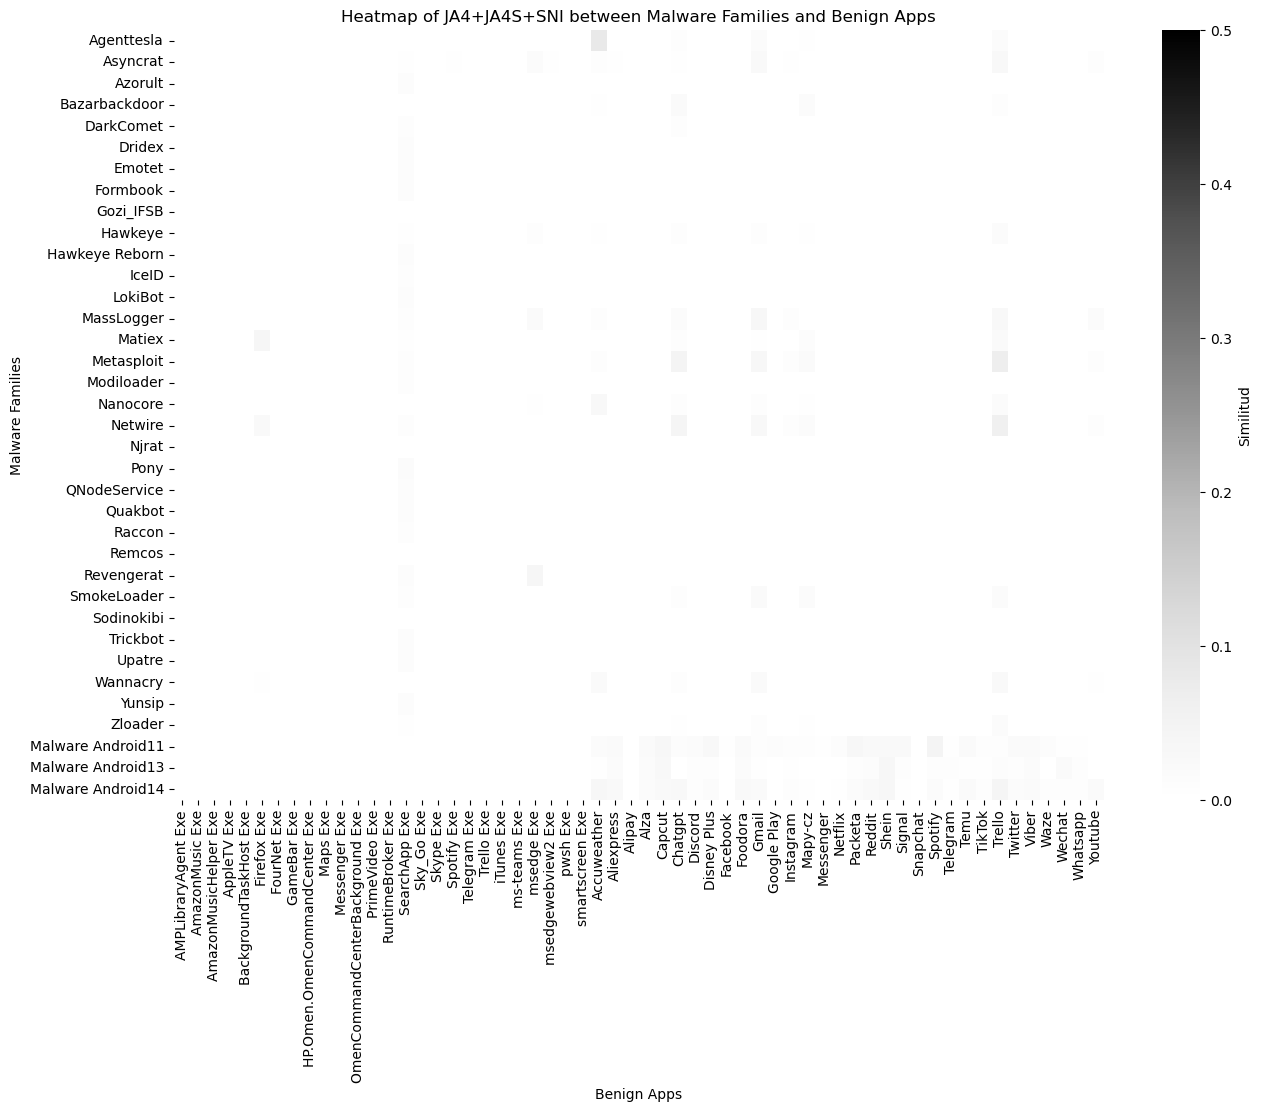

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df_similitud_ja4_ja4s_sni, cmap="Greys", annot=False, cbar_kws={'label': 'Similitud'}, vmin=0, vmax=0.5)

plt.title("Heatmap of JA4+JA4S+SNI between Malware Families and Benign Apps")
plt.xlabel("Benign Apps")
plt.ylabel("Malware Families")

plt.savefig('benign_malware_JA4_JA4S_SNI.png', bbox_inches='tight', dpi=300)
plt.show()

### JA4+JA4S+JA4X

In [58]:
ja4_malware_desktop = df_desktop_malware.groupby("AppName")["JA4+JA4S+JA4X"].unique().to_dict()
ja4_malware_movil = df_mobile_malware.groupby("AppName")["JA4+JA4S+JA4X"].unique().to_dict()

ja4_apps_desktop = df_desktop_apps.groupby("AppName")["JA4+JA4S+JA4X"].unique().to_dict()
ja4_apps_movil = df_mobile_apps.groupby("AppName")["JA4+JA4S+JA4X"].unique().to_dict()

ja4_malware = {**ja4_malware_desktop, **ja4_malware_movil}  
ja4_apps = {**ja4_apps_desktop, **ja4_apps_movil}

In [ ]:
import numpy as np

families_malware = list(ja4_malware.keys())
families_apps = list(ja4_apps.keys())

matriz_similitud_ja4_ja4s_ja4x = np.zeros((len(families_malware), len(families_apps)))

for i, fam_a in enumerate(families_malware):
    for j, fam_b in enumerate(families_apps):
        set_a = set(ja4_malware[fam_a])
        set_b = set(ja4_apps[fam_b])
        
        huellas_comunes = len(set_a & set_b)
        
        total_huellas = len(set_a) + len(set_b)
        similitud = huellas_comunes / total_huellas if total_huellas > 0 else 0
        
        matriz_similitud_ja4_ja4s_ja4x[i, j] = similitud

df_similitud_ja4_ja4s_ja4x = pd.DataFrame(matriz_similitud_ja4_ja4s_ja4x, index=families_malware, columns=families_apps)

print("Matriz de Similitud JA4 entre Malware y Aplicaciones Benignas:\n")
print(df_similitud_ja4_ja4s)


📊 Matriz de Similitud JA4 entre Malware y Aplicaciones Benignas:

                   AMPLibraryAgent Exe  AmazonMusic Exe  \
Agenttesla                    0.000000              0.0   
Asyncrat                      0.020833              0.0   
Azorult                       0.000000              0.0   
Bazarbackdoor                 0.000000              0.0   
DarkComet                     0.000000              0.0   
Dridex                        0.000000              0.0   
Emotet                        0.000000              0.0   
Formbook                      0.000000              0.0   
Gozi_IFSB                     0.000000              0.0   
Hawkeye                       0.000000              0.0   
Hawkeye Reborn                0.000000              0.0   
IceID                         0.000000              0.0   
LokiBot                       0.000000              0.0   
MassLogger                    0.033333              0.0   
Matiex                        0.000000          

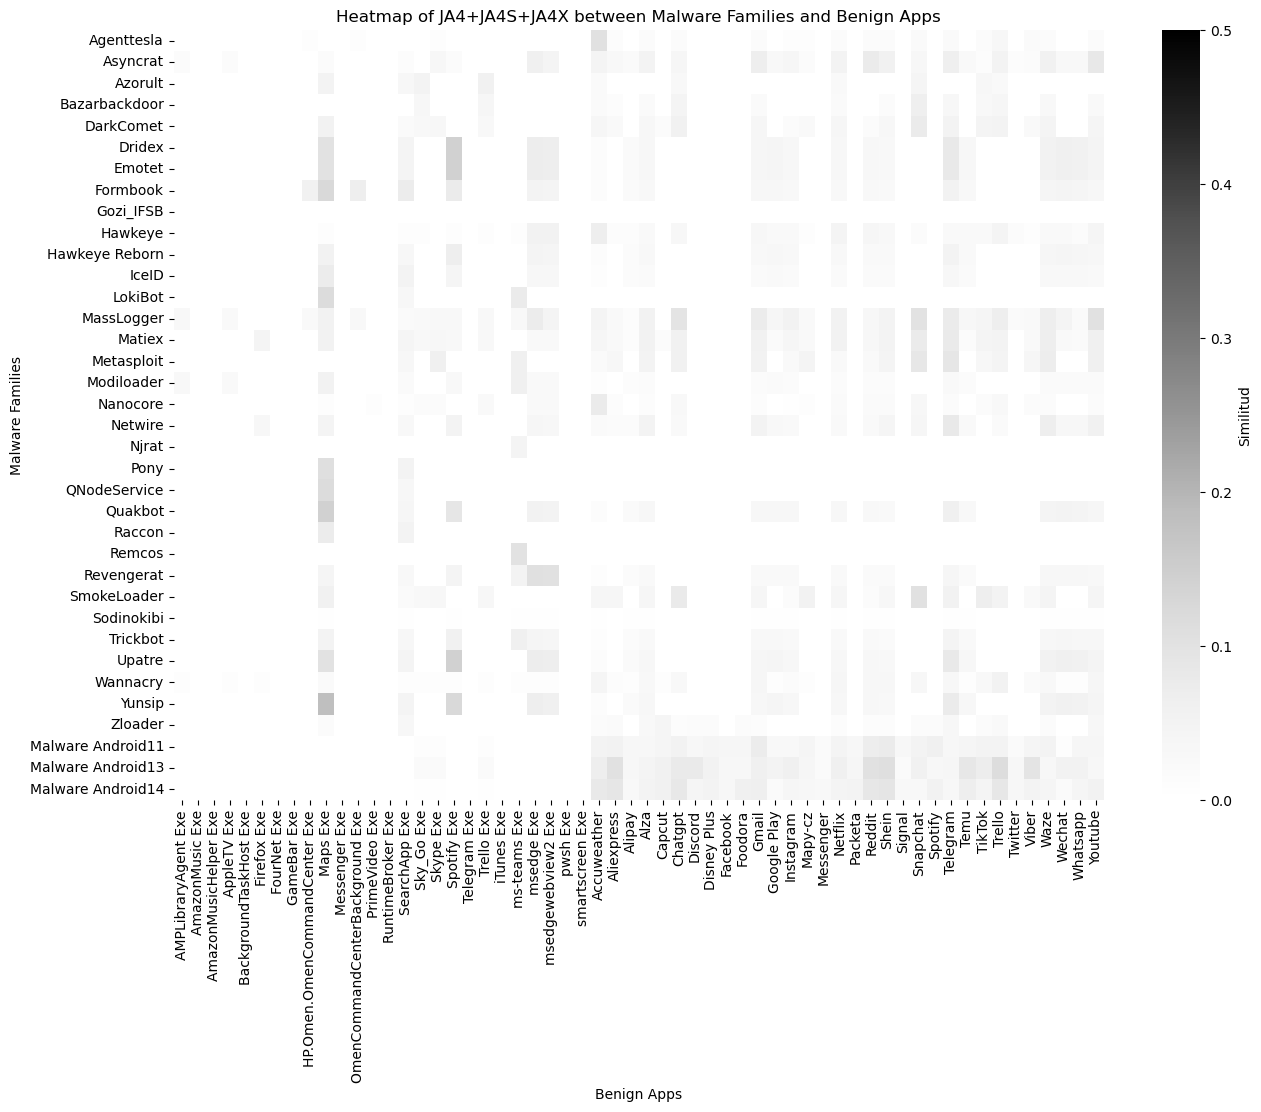

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df_similitud_ja4_ja4s_ja4x, cmap="Greys", annot=False, cbar_kws={'label': 'Similitud'}, vmin=0, vmax=0.5)

plt.title("Heatmap of JA4+JA4S+JA4X between Malware Families and Benign Apps")
plt.xlabel("Benign Apps")
plt.ylabel("Malware Families")

plt.savefig('benign_malware_JA4_JA4S_JA4X.png', bbox_inches='tight', dpi=300)
plt.show()

## Comparacion Desktop Malware vs Desktop Apps con mis apps (Tria.ge)

In [1]:
import pandas as pd


df_desktop_malware = pd.read_csv('../Datasets/Dataset2/desktop-malware.csv', sep=';')
df_desktop_apps = pd.read_csv('../Datasets/Dataset2/desktop-apps.csv', sep=';')
df_mydesktop_apps = pd.read_csv('../Datasets/Dataset2/mydesktop-apps.csv', sep=';')

df_desktop_apps = pd.concat([
    df_desktop_apps,
    df_mydesktop_apps
], ignore_index=True)


familias_desktop_malware = df_desktop_malware["AppName"].unique()
familias_desktop_apps = df_desktop_apps["AppName"].unique()


print("Ejemplo de familias en cada grupo:")
print("\t-Desktop Malware:", familias_desktop_malware[:5])
print("\t-Desktop Apps:", familias_desktop_apps[:5])

Ejemplo de familias en cada grupo:
	-Desktop Malware: ['Hawkeye' nan 'Netwire' 'Asyncrat' 'QNodeService']
	-Desktop Apps: ['AmazonMusic Exe' 'AmazonMusicHelper Exe' 'AMPLibraryAgent Exe'
 'AppleTV Exe' 'BackgroundTaskHost Exe']


In [2]:
df_desktop_malware["JA4+JA4S"] = df_desktop_malware["JA4hash"].astype(str) + "_" + df_desktop_malware["JA4Shash"].astype(str)
df_desktop_malware["JA4+JA4X"] = df_desktop_malware["JA4hash"].astype(str) + "_" + df_desktop_malware["JA4X"].astype(str)
df_desktop_malware["JA4+SNI"] = df_desktop_malware["JA4hash"].astype(str) + "_" + df_desktop_malware["SNI"].astype(str)
df_desktop_malware["JA4+JA4S+SNI"] = df_desktop_malware["JA4hash"].astype(str) + "_" + df_desktop_malware["JA4Shash"].astype(str) + "_" + df_desktop_malware["SNI"].astype(str)
df_desktop_malware["JA4+JA4S+JA4X"] = df_desktop_malware["JA4hash"].astype(str) + "_" + df_desktop_malware["JA4Shash"].astype(str) + "_" + df_desktop_malware["JA4X"].astype(str)

df_desktop_apps["JA4+JA4S"] = df_desktop_apps["JA4hash"].astype(str) + "_" + df_desktop_apps["JA4Shash"].astype(str)
df_desktop_apps["JA4+JA4X"] = df_desktop_apps["JA4hash"].astype(str) + "_" + df_desktop_apps["JA4X"].astype(str)
df_desktop_apps["JA4+SNI"] = df_desktop_apps["JA4hash"].astype(str) + "_" + df_desktop_apps["SNI"].astype(str)
df_desktop_apps["JA4+JA4S+SNI"] = df_desktop_apps["JA4hash"].astype(str) + "_" + df_desktop_apps["JA4Shash"].astype(str) + "_" + df_desktop_apps["SNI"].astype(str)
df_desktop_apps["JA4+JA4S+JA4X"] = df_desktop_apps["JA4hash"].astype(str) + "_" + df_desktop_apps["JA4Shash"].astype(str) + "_" + df_desktop_apps["JA4X"].astype(str)

### JA4

In [52]:
ja4_malware_desktop = df_desktop_malware.groupby("AppName")["JA4hash"].unique().to_dict()

ja4_apps_desktop = df_desktop_apps.groupby("AppName")["JA4hash"].unique().to_dict()

ja4_malware = {**ja4_malware_desktop}  
ja4_apps = {**ja4_apps_desktop}

In [ ]:
import numpy as np

families_malware = list(ja4_malware.keys())
families_apps = list(ja4_apps.keys())

matriz_similitud_ja4 = np.zeros((len(families_malware), len(families_apps)))

for i, fam_a in enumerate(families_malware):
    for j, fam_b in enumerate(families_apps):
        set_a = set(ja4_malware[fam_a])
        set_b = set(ja4_apps[fam_b])
        
        huellas_comunes = len(set_a & set_b)
        
        total_huellas = len(set_a) + len(set_b)
        similitud = huellas_comunes / total_huellas if total_huellas > 0 else 0
        
        matriz_similitud_ja4[i, j] = similitud

df_similitud_ja4 = pd.DataFrame(matriz_similitud_ja4, index=families_malware, columns=families_apps)

print("Matriz de Similitud JA4 entre Malware y Aplicaciones Benignas:\n")
print(df_similitud_ja4)


📊 Matriz de Similitud JA4 entre Malware y Aplicaciones Benignas:

                AMPLibraryAgent Exe  AmazonMusic Exe  AmazonMusicHelper Exe  \
Agenttesla                 0.000000              0.0                    0.0   
Asyncrat                   0.062500              0.0                    0.0   
Azorult                    0.125000              0.0                    0.0   
Bazarbackdoor              0.083333              0.0                    0.0   
DarkComet                  0.090909              0.0                    0.0   
Dridex                     0.250000              0.0                    0.0   
Emotet                     0.250000              0.0                    0.0   
Formbook                   0.125000              0.0                    0.0   
Gozi_IFSB                  0.333333              0.0                    0.0   
Hawkeye                    0.052632              0.0                    0.0   
Hawkeye Reborn             0.166667              0.0            

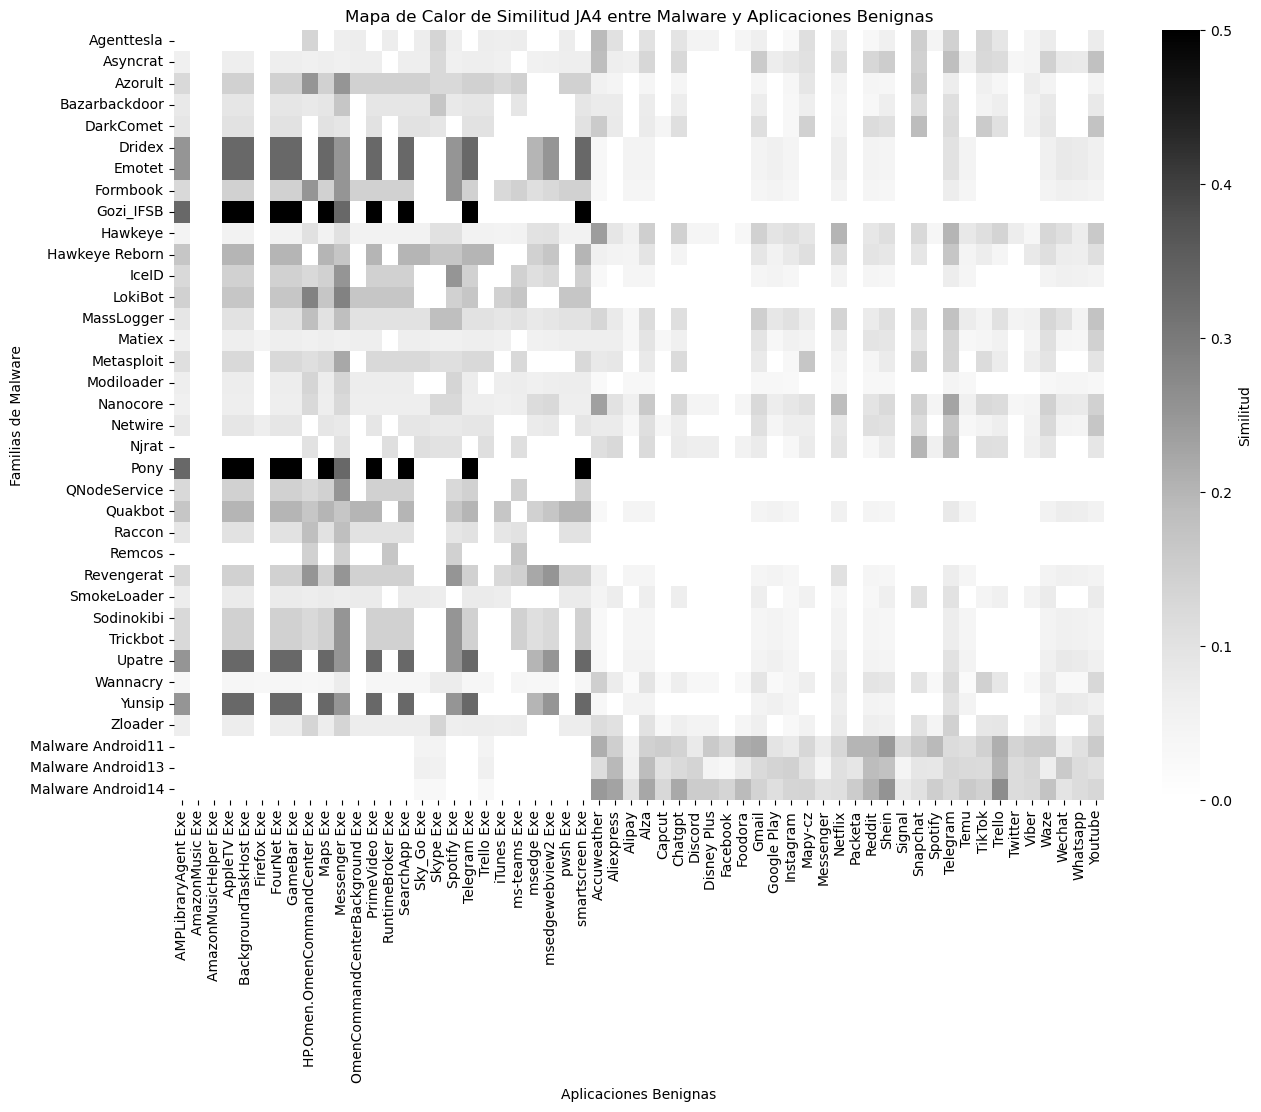

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df_similitud_ja4, cmap="Greys", annot=False, cbar_kws={'label': 'Similitud'}, vmin=0, vmax=0.5)

plt.title("Mapa de Calor de Similitud JA4 entre Malware y Aplicaciones Benignas")
plt.xlabel("Aplicaciones Benignas")
plt.ylabel("Familias de Malware")
plt.show()

### JA4+JA4S+JA4X

In [55]:
ja4_malware_desktop = df_desktop_malware.groupby("AppName")["JA4+JA4S+JA4X"].unique().to_dict()

ja4_apps_desktop = df_desktop_apps.groupby("AppName")["JA4+JA4S+JA4X"].unique().to_dict()

ja4_malware = {**ja4_malware_desktop}  
ja4_apps = {**ja4_apps_desktop}

In [ ]:
import numpy as np

families_malware = list(ja4_malware.keys())
families_apps = list(ja4_apps.keys())

matriz_similitud_ja4_ja4s_ja4x = np.zeros((len(families_malware), len(families_apps)))

for i, fam_a in enumerate(families_malware):
    for j, fam_b in enumerate(families_apps):
        set_a = set(ja4_malware[fam_a])
        set_b = set(ja4_apps[fam_b])
        
        huellas_comunes = len(set_a & set_b)
        
        total_huellas = len(set_a) + len(set_b)
        similitud = huellas_comunes / total_huellas if total_huellas > 0 else 0
        
        matriz_similitud_ja4_ja4s_ja4x[i, j] = similitud

df_similitud_ja4_ja4s_ja4x = pd.DataFrame(matriz_similitud_ja4_ja4s_ja4x, index=families_malware, columns=families_apps)

print("Matriz de Similitud JA4 entre Malware y Aplicaciones Benignas:\n")
print(df_similitud_ja4_ja4s)


📊 Matriz de Similitud JA4 entre Malware y Aplicaciones Benignas:

                   AMPLibraryAgent Exe  AmazonMusic Exe  \
Agenttesla                    0.000000              0.0   
Asyncrat                      0.020833              0.0   
Azorult                       0.000000              0.0   
Bazarbackdoor                 0.000000              0.0   
DarkComet                     0.000000              0.0   
Dridex                        0.000000              0.0   
Emotet                        0.000000              0.0   
Formbook                      0.000000              0.0   
Gozi_IFSB                     0.000000              0.0   
Hawkeye                       0.000000              0.0   
Hawkeye Reborn                0.000000              0.0   
IceID                         0.000000              0.0   
LokiBot                       0.000000              0.0   
MassLogger                    0.033333              0.0   
Matiex                        0.000000          

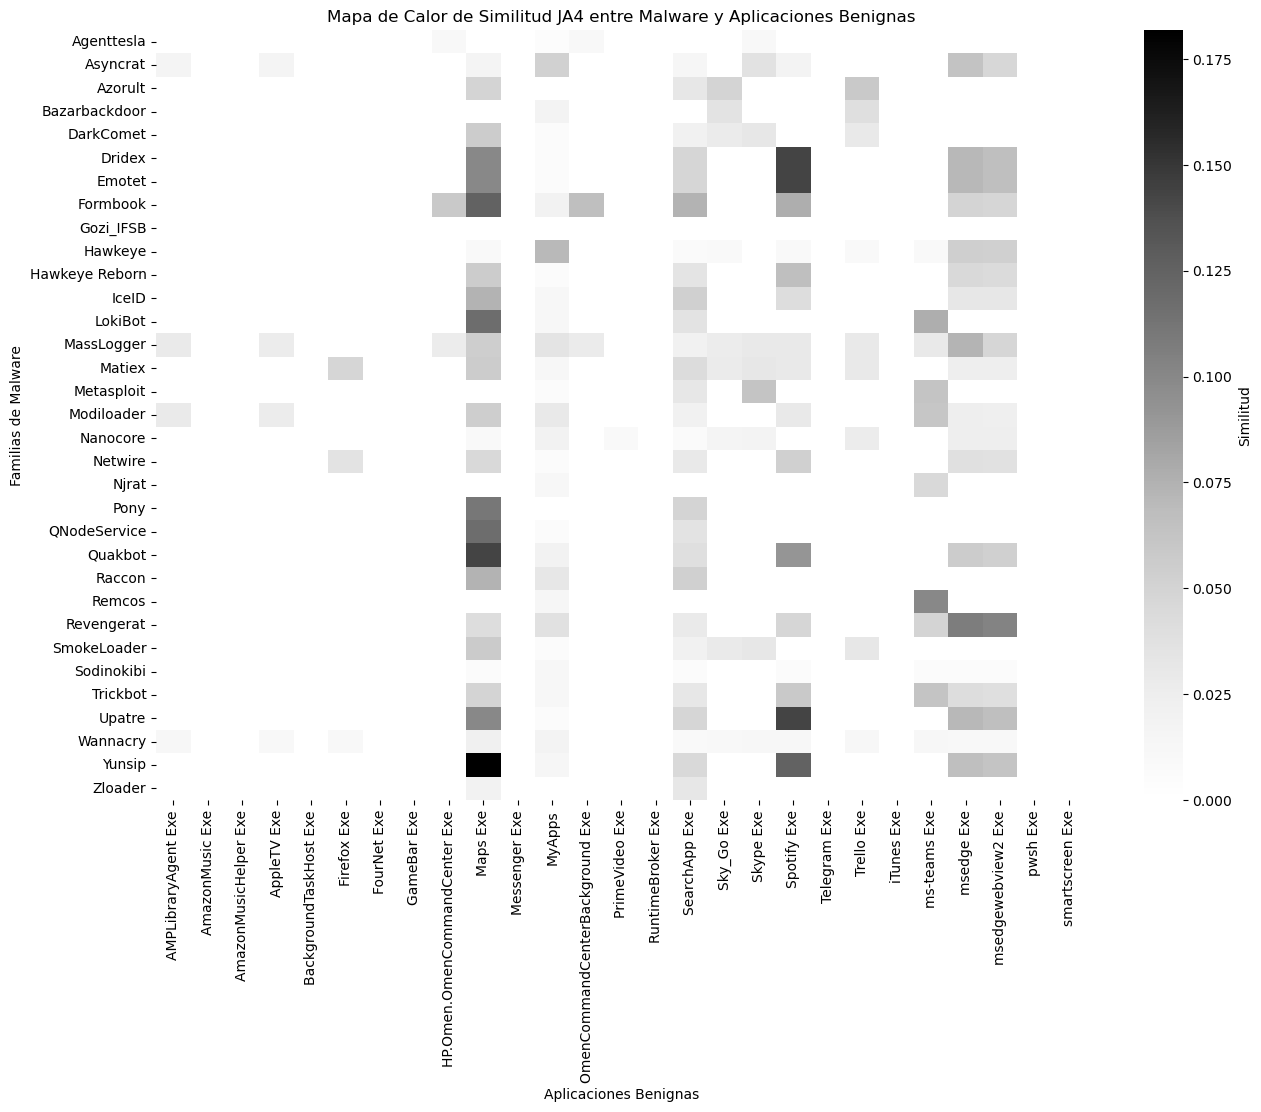

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df_similitud_ja4_ja4s_ja4x, cmap="Greys", annot=False, cbar_kws={'label': 'Similitud'})

plt.title("Mapa de Calor de Similitud JA4 entre Malware y Aplicaciones Benignas")
plt.xlabel("Aplicaciones Benignas")
plt.ylabel("Familias de Malware")
plt.show()